In [1]:
%matplotlib inline

In [2]:
#-----------------------------------------------------------
import math
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from matplotlib import cm        # module palettes de couleurs
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
#-----------------------------------------------------------
plt.rcParams['font.size'] = 18
plt.rcParams['figure.figsize'] = (18, 6)
#np.set_printoptions(edgeitems=10)
np.set_printoptions(linewidth = 220)
np.set_printoptions(precision=4)
#np.set_printoptions(precision=3,formatter={'float': '{:9.3f}'.format})
pd.set_option('precision', 5)
pd.set_option("display.max_columns",20)
pd.set_option('display.max_rows', 999)
#pd.set_option('max_colwidth', 6)

In [3]:
linestyles = [(0, ()), # solid 
              (0, (5, 10)),(0, (5, 5)),(0, (5, 1)), # dashed (loosely/normal/densely)
              (0, (3, 10, 1, 10)),(0, (3, 5, 1, 5)),(0, (3, 1, 1, 1)), # dotted  (loosely/normal/densely)
              (0, (3, 10, 1, 10, 1, 10)),(0, (3, 5, 1, 5, 1, 5)),(0, (3, 1, 1, 1, 1, 1)), # dashdotted(loosely/normal/densely)
              (0, (1, 10)),(0, (1, 5)),(0, (1, 1))]
couleurs = cm.Dark2.colors

In [20]:
# Importation des données

from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (1).csv


In [32]:
# chargement des donnees (avec pandas)
df = pd.read_csv("diabetes.csv",sep=',')

# un numpy array des valeurs numeriques (pour la suite)
data = df._get_numeric_data().values
nomDesIndividus_ = list(df.index)
nomDesVariables_ = list(df)

# on met une partie des individus et des variables de cote
indice_individus = np.array(range(768))
indice_variables = np.array(range(9))

# broadcasting 
X = data[indice_individus[:,None],indice_variables] 

# List Comprehensions
nomDesVariables = [nomDesVariables_[i] for i in indice_variables]
nomDesIndividus = [nomDesIndividus_[i] for i in indice_individus]

df.shape

(768, 9)

Etude préliminaire et visualisation des données :

Moyenne pour chaque variable

In [31]:
moyennes = X.mean(axis=0)
moyennes

array([  3.8451, 120.8945,  69.1055,  20.5365,  79.7995,  31.9926,   0.4719,  33.2409,   0.349 ])

Calcul des Ecart-types : 

In [28]:
ecartTypes = X.std(axis=0,ddof=1)
ecartTypes

array([  3.3696,  31.9726,  19.3558,  15.9522, 115.244 ,   7.8842,   0.3313,  11.7602,   0.477 ])

In [34]:
# Données centrées et données centrées-réduites

Xc = X - moyennes
Xcr = Xc / ecartTypes

Xcr

array([[ 0.6395,  0.8478,  0.1495, ...,  0.4682,  1.4251,  1.365 ],
       [-0.8443, -1.1227, -0.1604, ..., -0.3648, -0.1905, -0.7316],
       [ 1.2331,  1.9425, -0.2638, ...,  0.604 , -0.1055,  1.365 ],
       ...,
       [ 0.3428,  0.0033,  0.1495, ..., -0.6847, -0.2756, -0.7316],
       [-0.8443,  0.1597, -0.4704, ..., -0.3709,  1.17  ,  1.365 ],
       [-0.8443, -0.8725,  0.0462, ..., -0.4735, -0.8708, -0.7316]])

In [37]:
# Tableau des données à utiliser dans la suite

donnees = pd.DataFrame(data=Xcr, index=nomDesIndividus, columns=nomDesVariables)
donnees.columns = [str(col) + '_cr' for col in donnees.columns]
donnees

Pregnancies_cr  Glucose_cr  BloodPressure_cr  SkinThickness_cr  \
0           0.63953     0.84777           0.14954           0.90668   
1          -0.84433    -1.12266          -0.16044           0.53056   
2           1.23308     1.94246          -0.26377          -1.28737   
3          -0.84433    -0.99756          -0.16044           0.15443   
4          -1.14111     0.50373          -1.50371           0.90668   
5           0.34276    -0.15309           0.25287          -1.28737   
6          -0.25079    -1.34160          -0.98707           0.71862   
7           1.82662    -0.18436          -3.57027          -1.28737   
8          -0.54756     2.38033           0.04622           1.53355   
9           1.23308     0.12841           1.38948          -1.28737   
10          0.04598    -0.34075           1.18282          -1.28737   
11          1.82662     1.47331           0.25287          -1.28737   
12          1.82662     0.56628           0.56286          -1.28737   
13         -0.84433     2.13012          -0.47043           0.15443   
14          0.34276     1.41075           0.14954          -0.09632   
15          0.93630    -0.65351          -3.57027          -1.28737   
16         -1.14111    -0.09053           0.76951           1.65893   
17          0.93630    -0.43458           0.25287          -1.28737   
18         -0.84433    -0.55968          -2.02035           1.09474   
19         -0.84433    -0.18436           0.04622           0.59324   
20         -0.25079     0.15968           0.97617           1.28280   
21          1.23308    -0.68479           0.76951          -1.28737   
22          0.93630     2.34906           1.07950          -1.28737   
23          1.52985    -0.05925           0.56286           0.90668   
24          2.12340     0.69139           1.28615           0.78130   
25          1.82662     0.12841           0.04622           0.34249   
26          0.93630     0.81649           0.35620          -1.28737   
27         -0.84433    -0.74734          -0.16044          -0.34707   
28          2.71694     0.75394           0.66618          -0.09632   
29          0.34276    -0.12181           1.18282          -1.28737   
30          0.34276    -0.37202           0.30454           0.34249   
31         -0.25079     1.16054           0.35620           0.96937   
32         -0.25079    -1.02883          -0.57375          -0.59781   
33          0.63953    -0.90373           1.18282          -1.28737   
34          1.82662     0.03458           0.45953           0.65593   
35          0.04598    -0.55968          -0.47043           0.78130   
36          2.12340     0.53500           0.35620          -1.28737   
37          1.52985    -0.59096           0.35620           1.03205   
38         -0.54756    -0.96628          -0.05711           1.34549   
39          0.04598    -0.30947           0.14954           1.65893   
40         -0.25079     1.84863          -0.26377           0.27981   
41          0.93630     0.37862           0.76951          -1.28737   
42          0.93630    -0.46585           1.18282          -0.15900   
43          1.52985     1.56714           2.11278           0.21712   
44          0.93630     1.19182          -0.26377          -1.28737   
45         -1.14111     1.84863          -0.16044           1.15743   
46         -0.84433     0.78522          -0.67708          -1.28737   
47         -0.54756    -1.56054           0.04622           0.40518   
48          0.93630    -0.55968          -0.16044           0.71862   
49          0.93630    -0.49713          -3.57027          -1.28737   
50         -0.84433    -0.55968           0.56286          -0.59781   
51         -0.84433    -0.62224          -0.98707          -0.34707   
52          0.34276    -1.02883          -0.16044           0.02906   
53          1.23308     1.72352           1.07950           0.84399   
54          0.93630     0.91032          -0.16044           1.34549   
55         -0.84433    -1.497

In [38]:
# Calcul des composants principal

from sklearn.decomposition import PCA
import pandas as pd

# Load data into a pandas dataframe
df = donnees

# Perform PCA
pca = PCA()
pca.fit(df)

# Access the principal components and explained variance ratio
print(pca.components_)
print(pca.explained_variance_ratio_)

[[-0.216  -0.4368 -0.3005 -0.3073 -0.3363 -0.3973 -0.2376 -0.2787 -0.4157]
 [-0.5274 -0.0956 -0.0463  0.4484  0.3553  0.2103  0.1752 -0.5332 -0.1548]
 [-0.1645  0.3914 -0.6297 -0.2943  0.1417 -0.2519  0.2853 -0.1261  0.3946]
 [ 0.1609 -0.3271  0.0111  0.074  -0.0976 -0.1632  0.8735  0.1711 -0.1817]
 [ 0.2118  0.1088 -0.0594  0.1718  0.6504 -0.5275 -0.1566  0.2043 -0.3779]
 [ 0.4568 -0.3827 -0.6079  0.398   0.0087  0.241  -0.1716 -0.0011  0.1714]
 [ 0.0785 -0.208   0.3267  0.282  -0.0822 -0.5725 -0.0572 -0.2994  0.5804]
 [-0.5406  0.0252 -0.1628  0.4349 -0.2688 -0.1665 -0.0932  0.6149  0.0683]
 [-0.2651 -0.5811  0.0683 -0.3948  0.4785  0.1264 -0.0496  0.2888  0.3176]]
[0.2614 0.1971 0.1245 0.098  0.0938 0.0817 0.0543 0.0465 0.0428]


In [39]:
scores = pca.transform(df)
print(scores)

[[-1.7558 -1.111   0.2087 ...  0.4574  1.1237 -0.4936]
 [ 1.5064  0.559  -0.6502 ...  0.3662  0.8519 -0.0313]
 [-0.6504 -1.9283  2.0064 ...  0.721  -0.7928 -1.063 ]
 ...
 [ 0.5737 -0.0338 -0.4194 ...  0.2133 -0.2508 -0.3807]
 [ 0.1726 -1.322   1.1242 ...  0.0412  1.0505  1.0351]
 [ 1.3204  1.0268 -0.7859 ...  0.351   0.3907 -0.3422]]


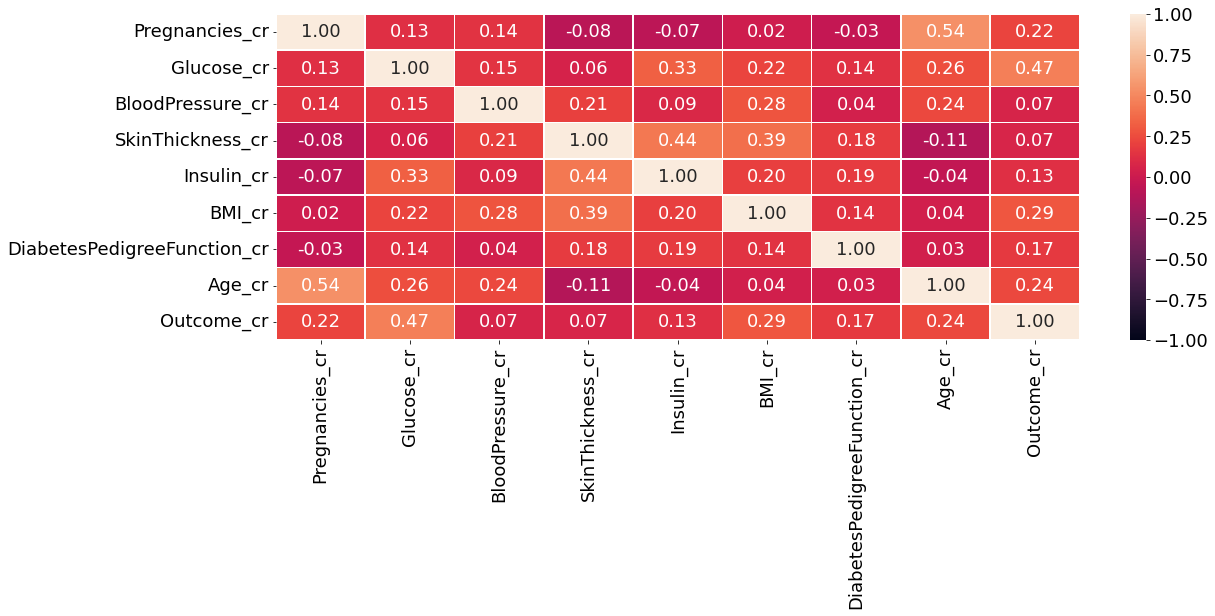

In [40]:
# Matrice de corrélation
ax = sns.heatmap(df.iloc[indice_individus,indice_variables].corr(), annot=True, fmt=".2f", linewidths=.5, vmin=-1, vmax=1)

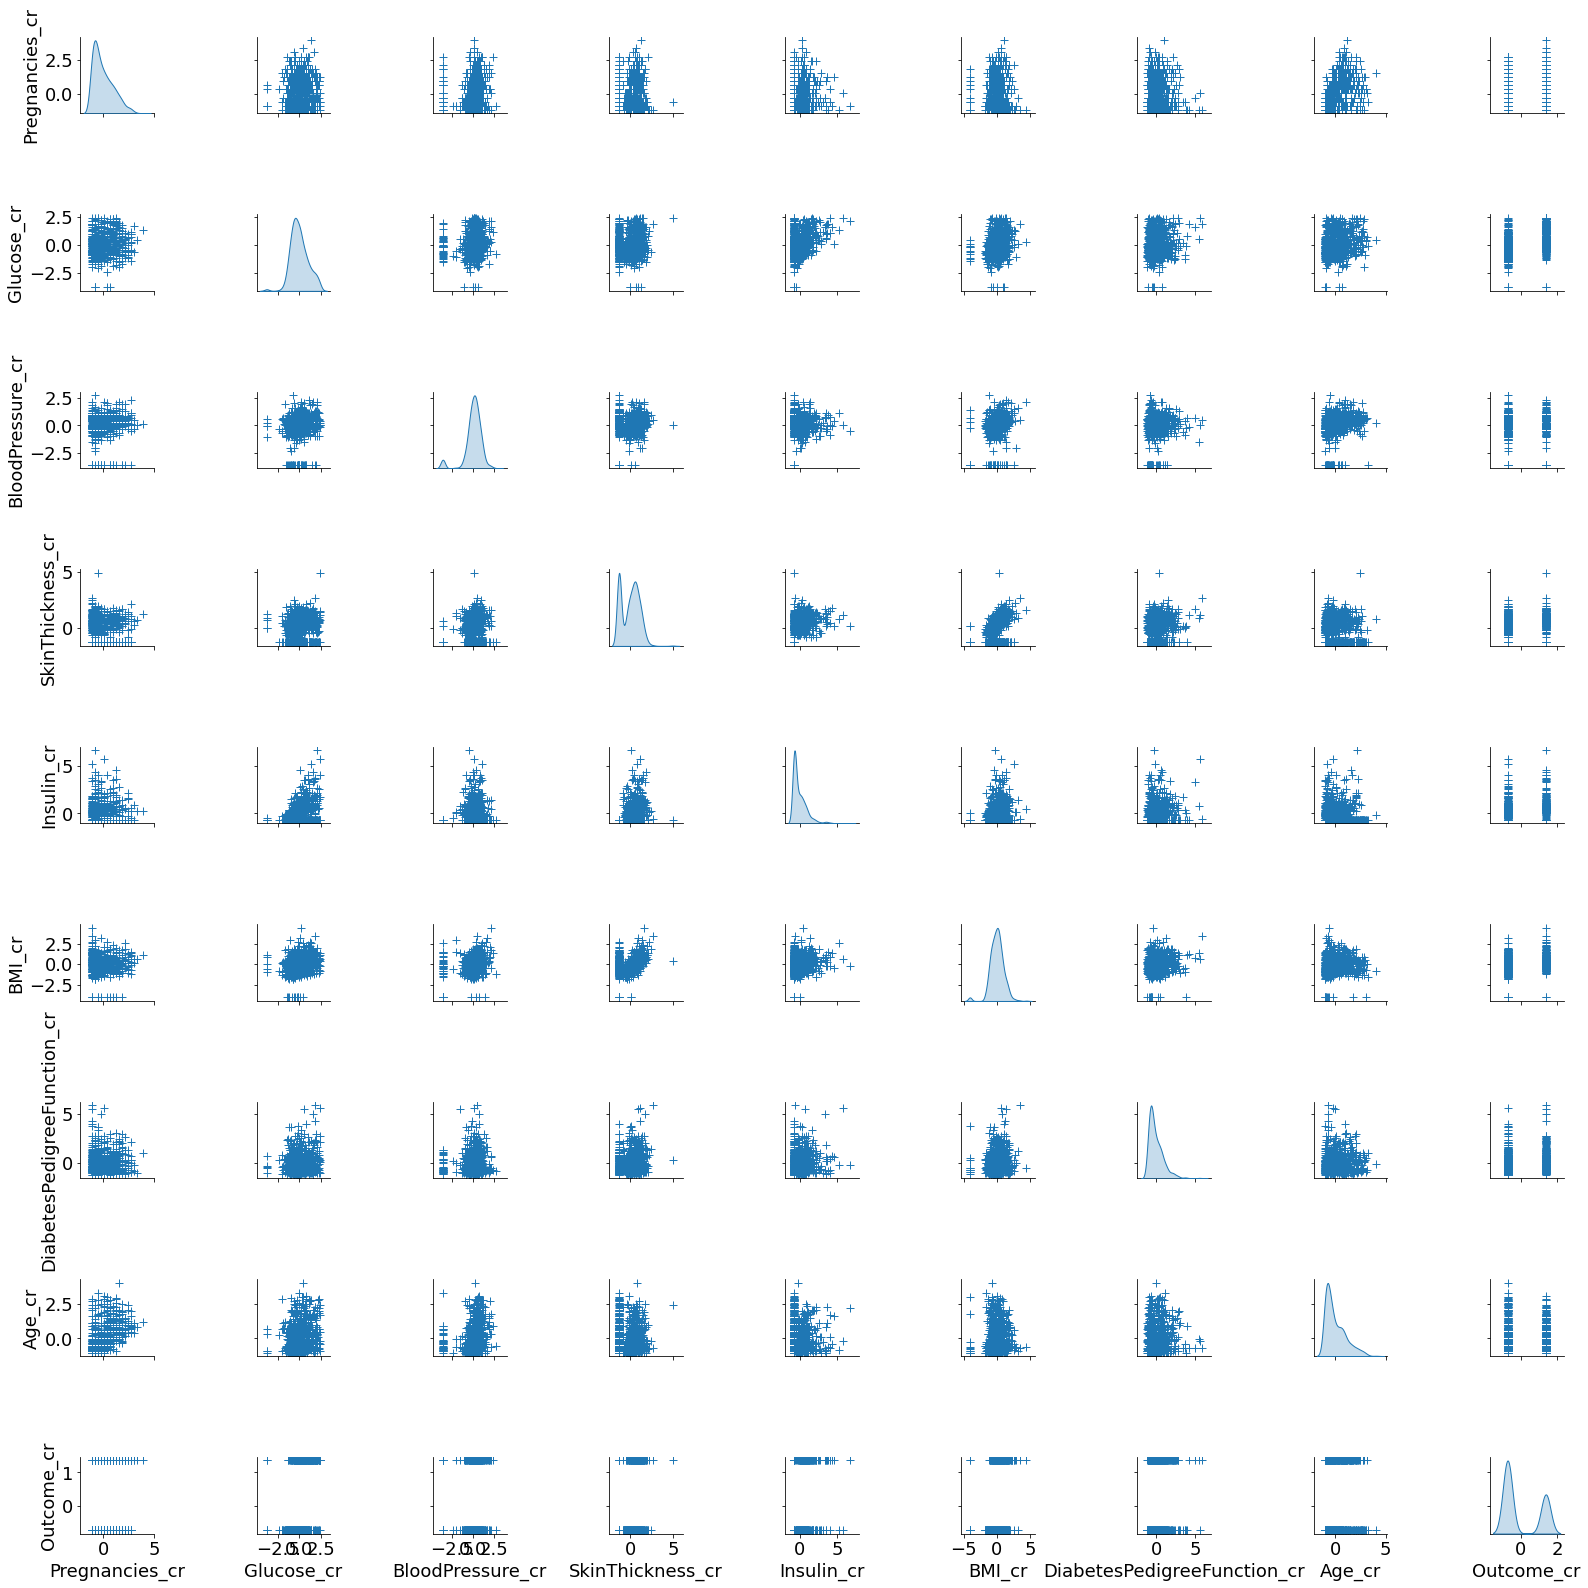

In [41]:
# Diagrammes de dispersion

g = sns.pairplot(df.iloc[indice_individus,indice_variables], diag_kind="kde", markers="+",
                  plot_kws=dict(s=50, edgecolor="b", linewidth=1),
                  diag_kws=dict(shade=True))

In [42]:
n_components=9
acp = PCA(n_components=n_components)
etude_centreeReduite = True
if etude_centreeReduite:
    CP = acp.fit(Xcr)
    lesNouvellesCoordonnees = acp.transform(Xcr)
else:
    CP = acp.fit(X)
    lesNouvellesCoordonnees = acp.transform(X)
# mise en forme
plesNouvellesCoordonnees = pd.DataFrame(data=lesNouvellesCoordonnees, index=nomDesIndividus_, columns=list(range(1,n_components+1)))
plesNouvellesCoordonnees.columns = ['CP_' + str(col) for col in plesNouvellesCoordonnees.columns]
plesNouvellesCoordonnees

CP_1     CP_2     CP_3     CP_4     CP_5     CP_6     CP_7     CP_8  \
0   -1.75580 -1.11102  0.20866  0.33349 -0.48139  0.43272  0.45736  1.12368   
1    1.50644  0.55904 -0.65020  0.22978  0.00488  0.11923  0.36623  0.85189   
2   -0.65040 -1.92832  2.00643 -0.02611 -0.23390 -0.67361  0.72100 -0.79284   
3    1.58636  1.06438 -0.47413 -0.58028  0.29723  0.07085  0.34453 -0.03060   
4   -2.48176  2.35803  2.92361  3.93405 -1.56533  0.20027 -0.81460  0.39845   
5    1.44269 -1.05473 -0.27768 -0.41570  0.14527 -0.63712  0.00411 -0.61235   
6    0.50673  0.62593  0.39149 -0.48918 -0.44017  1.60576  1.22098  0.35433   
7    1.86741 -1.38890  1.51649 -0.60102  0.04845  2.70792 -1.78928 -1.03122   
8   -3.49353  0.86200  1.21482 -1.90227  3.09328 -0.19478  0.03070  1.18111   
9    0.61373 -3.68297  0.38501  0.22802  1.61946 -1.47054  2.84624  0.65816   
10   0.71174 -0.60845 -1.27997 -0.66657 -0.79130 -0.89413 -0.54601 -0.85859   
11  -1.42033 -1.99034  0.79239 -0.40258 -1.07483 -0.01786 -0.06111 -1.37753   
12  -0.88985 -2.44901  0.29493  3.22211  0.30211 -1.02198 -0.93814 -0.41552   
13  -3.91955  1.22644  2.42449 -1.50433  4.52450 -0.58348 -0.87957  0.36740   
14  -1.74201 -1.19303  1.19222 -0.05035  0.89038 -0.52202  0.45712  0.68211   
15   1.33814 -1.29127  2.74528  0.10443 -0.74221  2.49655 -0.29668 -0.24823   
16  -2.16019  2.08243 -0.44630 -0.50775 -0.68045  0.33244  0.37426  0.52273   
17   0.30265 -1.57598  0.24896 -0.53757 -0.82734  0.19579  1.00104 -0.84428   
18   0.63524  1.36611 -0.02244 -0.76305 -0.26122  1.86248 -1.49326  1.01986   
19  -0.69091  0.72156  0.40078 -0.21425 -0.74712  0.17827  0.76750  0.62172   
20  -1.23878  1.83947 -0.95313  0.38449  0.57211 -0.26849 -0.31940 -0.41926   
21   0.22547 -2.04386 -1.32419  0.48831 -0.15128 -0.14007 -0.89974 -0.40501   
22  -2.05378 -1.95756  0.55447 -0.98530 -1.17538 -1.16326 -0.33720 -0.65648   
23  -0.68566 -0.87604 -0.49437 -0.39198 -0.30112  0.98514  1.78251 -0.34638   
24  -2.64444 -1.69987 -1.02384 -0.52798  0.54365  0.72546  0.65930 -0.16884   
25  -1.18732 -1.44373 -0.08274 -0.57231  0.46025  1.24027  0.90883 -0.33222   
26  -1.05519 -1.98147  0.23433 -0.96605 -1.14598 -0.04892 -0.24312 -0.40985   
27   1.49068  0.95057  0.24937  0.22143  0.69187 -0.53664  0.39337 -0.28394   
28  -0.77746 -2.83120 -0.93187  0.24833  2.22327  0.20212 -0.05384 -0.20780   
29   0.43414 -1.16480 -1.09132 -0.11667 -0.40050 -1.02571 -0.54298 -0.56238   
30  -0.46047 -1.20569 -1.23257  0.90789  0.06076  0.20041 -1.05245  1.33454   
31  -2.03505  1.16521  1.12284  0.19916  0.39103 -0.35097  0.89952 -0.13603   
32   2.01479  0.23229  0.02932 -0.15440  0.27998  0.15002  0.27592 -0.42501   
33   1.77100 -1.25074 -1.01352 -0.05749  0.42398 -0.94687  0.95446 -0.92371   
34  -0.29831 -1.45582 -1.10739  0.90453  0.78133  0.51527  0.11628  0.05628   
35   0.16655  0.91955  0.37233  1.74566  1.31779  0.21496  0.18322  0.08292   
36   0.06793 -1.97267 -0.47423  0.13962  0.06599 -0.03151 -0.68243 -1.53511   
37  -1.31755 -1.21358 -0.57000  1.01541 -0.48070  1.27362  1.07551  0.42185   
38  -0.37776  0.99486 -0.31224  0.00932 -1.49114  1.09197  1.07067  0.67934   
39  -2.82324  0.51307  0.36724  2.52331  0.07402  0.63080  0.17729  1.28491   
40  -0.21278  0.45180  0.38834 -1.16257  0.26777 -0.51049 -0.75585 -0.04470   
41  -0.32966 -1.10871 -0.60787  0.61620 -0.79093 -0.69430 -1.21496 -1.08538   
42   0.52020 -1.75043 -1.48654  0.28748  0.86621 -0.47041  0.48422  0.39101   
43  -4.09758 -1.12627 -0.73355  0.07048  0.14042 -0.57390 -0.32158 -0.58531   
44   0.48795 -1.82872  0.39175 -0.41245  0.45728 -0.56076 -0.79919 -0.35648   
45  -2.53120  1.88621  2.10465  2.53482 -2.28255 -0.87226 -0.11317  0.43068   
46   1.12541 -0.12868  1.06279 -0.06631 -0.41202 -1.03581 -0.92301 -0.03640   
47   1.58417  0.94827 -0.70950  0.87340 -0.37475  0.16875  0.59969  0.02601   
48  -0.67828 -0.34441 -0.35621 -0.31213 -1.14984  1.53700  0.75232 -0.13360   
49   3.97118 -1.51394  2.86939  0.46692  2.01984  1.25375 

In [43]:
acp.components_

array([[-0.216 , -0.4368, -0.3005, -0.3073, -0.3363, -0.3973, -0.2376, -0.2787, -0.4157],
       [-0.5274, -0.0956, -0.0463,  0.4484,  0.3553,  0.2103,  0.1752, -0.5332, -0.1548],
       [-0.1645,  0.3914, -0.6297, -0.2943,  0.1417, -0.2519,  0.2853, -0.1261,  0.3946],
       [ 0.1609, -0.3271,  0.0111,  0.074 , -0.0976, -0.1632,  0.8735,  0.1711, -0.1817],
       [ 0.2118,  0.1088, -0.0594,  0.1718,  0.6504, -0.5275, -0.1566,  0.2043, -0.3779],
       [ 0.4568, -0.3827, -0.6079,  0.398 ,  0.0087,  0.241 , -0.1716, -0.0011,  0.1714],
       [ 0.0785, -0.208 ,  0.3267,  0.282 , -0.0822, -0.5725, -0.0572, -0.2994,  0.5804],
       [-0.5406,  0.0252, -0.1628,  0.4349, -0.2688, -0.1665, -0.0932,  0.6149,  0.0683],
       [-0.2651, -0.5811,  0.0683, -0.3948,  0.4785,  0.1264, -0.0496,  0.2888,  0.3176]])

In [44]:
#np.diag(np.cov(Xcr.T))
np.set_printoptions(precision=2)
print("variances :")
print(acp.explained_variance_," (facteurs)")
if etude_centreeReduite:
    print(np.diag(np.cov(Xcr.T,ddof=1))," (donnees)")
else:
    print(np.diag(np.cov(X.T,ddof=1))," (donnees)")

print("variance totale :")
print(" -",sum(acp.explained_variance_)," (facteurs)")
if etude_centreeReduite:
    print(" -",np.sum(np.diag(np.cov(Xcr.T,ddof=1)))," (donnees)")
else:
    print(" -",np.sum(np.diag(np.cov(X.T,ddof=1)))," (donnees)")
np.set_printoptions(precision=4)

variances :
[2.35 1.77 1.12 0.88 0.84 0.73 0.49 0.42 0.38]  (facteurs)
[1. 1. 1. 1. 1. 1. 1. 1. 1.]  (donnees)
variance totale :
 - 9.000000000000009  (facteurs)
 - 9.000000000000005  (donnees)


In [45]:
np.set_printoptions(precision=2)
print("inerties :")
print(acp.explained_variance_*(acp.n_samples_-1),"(methode 1)")
print(acp.singular_values_**2,"(methode 2)")
#
print("inertie totale :")
print(np.sum(acp.explained_variance_*(acp.n_samples_-1)),"(methode 1)")
print(np.sum(acp.singular_values_**2),"(methode 2)")
np.set_printoptions(precision=4)
#
with np.printoptions(formatter={'float': '{: 7.3f}'.format}):
    print("pourcentages d'inertie :\n",acp.explained_variance_ratio_*100)
    print("pourcentages d'inertie (cumules) :\n",np.cumsum(acp.explained_variance_ratio_)*100)

inerties :
[1804.37 1360.9   859.21  676.46  647.83  563.64  374.62  320.74  295.23] (methode 1)
[1804.37 1360.9   859.21  676.46  647.83  563.64  374.62  320.74  295.23] (methode 2)
inertie totale :
6903.000000000006 (methode 1)
6903.000000000006 (methode 2)
pourcentages d'inertie :
 [ 26.139  19.715  12.447   9.799   9.385   8.165   5.427   4.646   4.277]
pourcentages d'inertie (cumules) :
 [ 26.139  45.853  58.300  68.100  77.485  85.650  91.077  95.723  100.000]


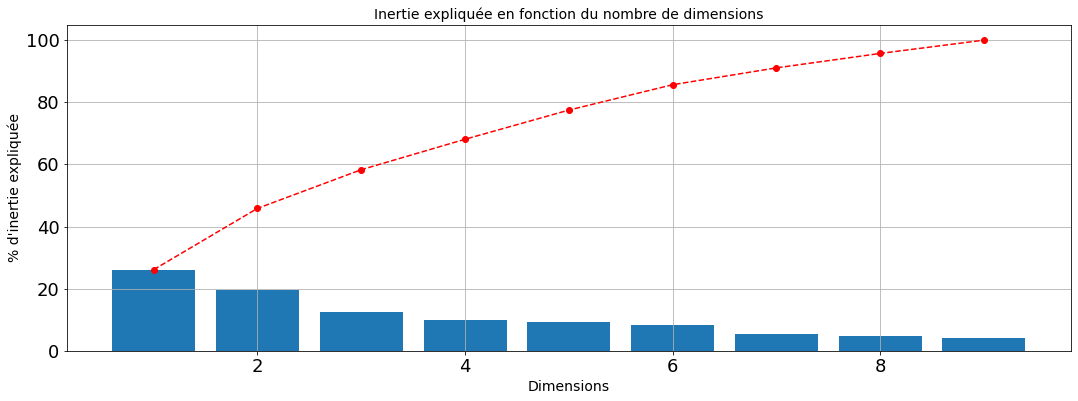

In [46]:
plt.bar(np.arange(len(acp.explained_variance_ratio_))+1,acp.explained_variance_ratio_*100)
plt.plot(np.arange(len(acp.explained_variance_ratio_))+1,np.cumsum(acp.explained_variance_ratio_*100),'r--o')
plt.xlabel("Dimensions",fontsize=14)
plt.ylabel("% d'inertie expliquée",fontsize=14)
plt.title("Inertie expliquée en fonction du nombre de dimensions",fontsize=14);
plt.grid(True)

In [47]:
# nombres de dimensions
pourcentageDInertieSeuil = 80
pourcentageDInertieSeuil = 90
d = np.argmax(np.cumsum(acp.explained_variance_ratio_)>=pourcentageDInertieSeuil/100)+1
print("Nombres de dimensions (>={:.1f}% inertie) : ".format(pourcentageDInertieSeuil),d)

Nombres de dimensions (>=90.0% inertie) :  7


In [48]:
qual = lesNouvellesCoordonnees*lesNouvellesCoordonnees
qual = (qual.T / qual.sum(axis=1)).T
qualite = pd.DataFrame(data=qual, index=nomDesIndividus, columns=list(range(1,acp.n_features_+1)))
del qual
#qualite.add_prefix('CP_')
qualite.columns = ['CP_' + str(col) for col in qualite.columns]
qualite*100

CP_1         CP_2         CP_3      CP_4      CP_5         CP_6  \
0    46.66421  1.86842e+01  6.59010e-01   1.68342   3.50780  2.83431e+00   
1    57.70769  7.94727e+00  1.07505e+01   1.34267   0.00061  3.61512e-01   
2     3.86149  3.39433e+01  3.67490e+01   0.00622   0.49942  4.14197e+00   
3    56.14829  2.52770e+01  5.01570e+00   7.51275   1.97120  1.11999e-01   
4    15.74484  1.42140e+01  2.18504e+01  39.56389   6.26371  1.02527e-01   
5    48.64426  2.60000e+01  1.80210e+00   4.03884   0.49319  9.48691e+00   
6     4.22790  6.45100e+00  2.52362e+00   3.94013   3.19023  4.24555e+01   
7    17.31886  9.58037e+00  1.14214e+01   1.79398   0.01166  3.64175e+01   
8    40.55535  2.46910e+00  4.90392e+00  12.02442  31.79494  1.26064e-01   
9     1.36601  4.91928e+01  5.37588e-01   0.18855   9.51140  7.84253e+00   
10    9.22761  6.74353e+00  2.98428e+01   8.09341  11.40570  1.45628e+01   
11   19.78849  3.88585e+01  6.15906e+00   1.58976  11.33223  3.12950e-03   
12    4.02598  3.04942e+01  4.42245e-01  52.78557   0.46404  5.31033e+00   
13   27.20711  2.66381e+00  1.04100e+01   4.00771  36.25358  6.02918e-01   
14   39.39461  1.84774e+01  1.84523e+01   0.03291  10.29171  3.53756e+00   
15    9.87823  9.19828e+00  4.15765e+01   0.06016   3.03898  3.43839e+01   
16   41.01724  3.81174e+01  1.75080e+00   2.26615   4.06978  9.71443e-01   
17    1.60969  4.36482e+01  1.08927e+00   5.07838  12.02899  6.73681e-01   
18    4.17731  1.93194e+01  5.21144e-03   6.02743   0.70638  3.59092e+01   
19   15.23068  1.66118e+01  5.12489e+00   1.46462  17.80963  1.01403e+00   
20   23.01639  5.07501e+01  1.36256e+01   2.21725   4.90926  1.08117e+00   
21    0.67463  5.54371e+01  2.32702e+01   3.16439   0.30369  2.60365e-01   
22   32.49621  2.95228e+01  2.36855e+00   7.47933  10.64349  1.04251e+01   
23    7.23596  1.18121e+01  3.76170e+00   2.36487   1.39560  1.49375e+01   
24   55.94917  2.31184e+01  8.38661e+00   2.23026   2.36466  4.21062e+00   
25   21.60192  3.19396e+01  1.04900e-01   5.01902   3.24597  2.35717e+01   
26   14.53151  5.12416e+01  7.16663e-01  12.17993  17.13950  3.12359e-02   
27   50.67325  2.06053e+01  1.41806e+00   1.11814  10.91596  6.56722e+00   
28    4.00282  5.30827e+01  5.75072e+00   0.40838  32.73371  2.70536e-01   
29    4.09339  2.94663e+01  2.58660e+01   0.29560   3.48361  2.28493e+01   
30    3.04366  2.08668e+01  2.18076e+01  11.83185   0.05299  5.76509e-01   
31   52.39113  1.71759e+01  1.59495e+01   0.50179   1.93433  1.55833e+00   
32   89.77721  1.19334e+00  1.90160e-02   0.52724   1.73363  4.97732e-01   
33   36.54657  1.82281e+01  1.19695e+01   0.03852   2.09455  1.04469e+01   
34    1.40832  3.35413e+01  1.94073e+01  12.94835   9.66138  4.20181e+00   
35    0.47152  1.43744e+01  2.35660e+00  51.80335  29.52098  7.85508e-01   
36    0.06021  5.07731e+01  2.93431e+00   0.25433   0.05681  1.29572e-02   
37   22.38623  1.89927e+01  4.18988e+00  13.29623   2.97984  2.09183e+01   
38    2.26506  1.57100e+01  1.54751e+00   0.00138  35.29258  1.89266e+01   
39   44.78578  1.47908e+00  7.57801e-01  35.77549   0.03079  2.23576e+00   
40    0.90874  4.09704e+00  3.02699e+00  27.12792   1.43909  5.23061e+00   
41    1.83336  2.07374e+01  6.23346e+00   6.40559  10.55322  8.13210e+00   
42    3.86132  4.37207e+01  3.15320e+01   1.17923  10.70639  3.15755e+00   
43   85.33281  6.44685e+00  2.73478e+00   0.02525   0.10021  1.67394e+00   
44    3.97050  5.57685e+01  2.55926e+00   2.83683   3.48704  5.24380e+00   
45   22.14898  1.22993e+01  1.53130e+01  22.21236  18.01113  2.63020e+00   
46   26.65349  3.48441e-01  2.37697e+01   0.09254   3.57241  2.25782e+01   
47   48.21582  1.72763e+01  9.67140e+00  14.65605   2.69821  5.47093e-01   
48    9.06933  2.33838e+00  2.50140e+00   1.92052  26.06370  4.65699e+01   
49   46.54775  6.76509e+00  2.43017e+01   0.64350  12.04185  4.63963e+00   
50   46.37211  4.53573e+00  4.85126e-04   1.45247   5.32784  2.83013e+01   
51   77.35972  6.40305e+00  9.91722e+00   3.75445   0.541

In [50]:
contr = lesNouvellesCoordonnees*lesNouvellesCoordonnees
contr = contr / contr.sum(axis=0)
contribution = pd.DataFrame(data=contr, index=nomDesIndividus, columns=list(range(1,acp.n_features_+1)))
del contr
contribution.columns = ['CP_' + str(col) for col in contribution.columns]
contribution*100

CP_1         CP_2         CP_3         CP_4         CP_5  \
0    1.70854e-01  9.07021e-02  5.06709e-03  1.64406e-02  3.57720e-02   
1    1.25770e-01  2.29648e-02  4.92038e-02  7.80544e-03  3.68264e-06   
2    2.34441e-02  2.73233e-01  4.68542e-01  1.00795e-04  8.44528e-03   
3    1.39470e-01  8.32471e-02  2.61637e-02  4.97767e-02  1.36377e-02   
4    3.41345e-01  4.08575e-01  9.94805e-01  2.28790e+00  3.78228e-01   
5    1.15350e-01  8.17450e-02  8.97413e-03  2.55463e-02  3.25740e-03   
6    1.42307e-02  2.87891e-02  1.78381e-02  3.53748e-02  2.99082e-02   
7    1.93266e-01  1.41748e-01  2.67656e-01  5.33993e-02  3.62406e-04   
8    6.76398e-01  5.46000e-02  1.71760e-01  5.34936e-01  1.47700e+00   
9    2.08749e-02  9.96716e-01  1.72522e-02  7.68577e-03  4.04838e-01   
10   2.80752e-02  2.72032e-02  1.90677e-01  6.56823e-02  9.66545e-02   
11   1.11804e-01  2.91091e-01  7.30772e-02  2.39584e-02  1.78330e-01   
12   4.38845e-02  4.40713e-01  1.01234e-02  1.53475e+00  1.40884e-02   
13   8.51426e-01  1.10527e-01  6.84135e-01  3.34537e-01  3.15996e+00   
14   1.68180e-01  1.04587e-01  1.65429e-01  3.74782e-04  1.22375e-01   
15   9.92383e-02  1.22520e-01  8.77148e-01  1.61217e-03  8.50343e-02   
16   2.58618e-01  3.18652e-01  2.31822e-02  3.81124e-02  7.14711e-02   
17   5.07639e-03  1.82506e-01  7.21392e-03  4.27190e-02  1.05659e-01   
18   2.23639e-02  1.37133e-01  5.85913e-05  8.60729e-02  1.05331e-02   
19   2.64558e-02  3.82576e-02  1.86944e-02  6.78592e-03  8.61634e-02   
20   8.50476e-02  2.48635e-01  1.05731e-01  2.18536e-02  5.05251e-02   
21   2.81738e-03  3.06958e-01  2.04081e-01  3.52494e-02  3.53245e-03   
22   2.33766e-01  2.81583e-01  3.57813e-02  1.43514e-01  2.13255e-01   
23   2.60549e-02  5.63925e-02  2.84448e-02  2.27135e-02  1.39965e-02   
24   3.87564e-01  2.12328e-01  1.22000e-01  4.12087e-02  4.56232e-02   
25   7.81284e-02  1.53160e-01  7.96739e-04  4.84193e-02  3.26985e-02   
26   6.17076e-02  2.88503e-01  6.39098e-03  1.37961e-01  2.02718e-01   
27   1.23153e-01  6.63965e-02  7.23747e-03  7.24845e-03  7.38917e-02   
28   3.34988e-02  5.89002e-01  1.01067e-01  9.11607e-03  7.63002e-01   
29   1.04456e-02  9.96957e-02  1.38613e-01  2.01208e-03  2.47597e-02   
30   1.17513e-02  1.06818e-01  1.76816e-01  1.21850e-01  5.69860e-04   
31   2.29522e-01  9.97666e-02  1.46737e-01  5.86373e-03  2.36028e-02   
32   2.24976e-01  3.96493e-03  1.00072e-04  3.52423e-03  1.21002e-02   
33   1.73825e-01  1.14950e-01  1.19555e-01  4.88672e-04  2.77474e-02   
34   4.93187e-03  1.55736e-01  1.42725e-01  1.20951e-01  9.42358e-02   
35   1.53723e-03  6.21333e-02  1.61341e-02  4.50482e-01  2.68061e-01   
36   2.55770e-04  2.85946e-01  2.61747e-02  2.88155e-03  6.72170e-04   
37   9.62074e-02  1.08222e-01  3.78141e-02  1.52419e-01  3.56687e-02   
38   7.90873e-03  7.27281e-02  1.13471e-02  1.28396e-05  3.43224e-01   
39   4.41743e-01  1.93429e-02  1.56967e-02  9.41236e-01  8.45738e-04   
40   2.50920e-03  1.49992e-02  1.75523e-02  1.99801e-01  1.10676e-02   
41   6.02293e-03  9.03263e-02  4.30046e-02  5.61311e-02  9.65635e-02   
42   1.49973e-02  2.25147e-01  2.57190e-01  1.22169e-02  1.15821e-01   
43   9.30528e-01  9.32097e-02  6.26268e-02  7.34414e-04  3.04361e-03   
44   1.31955e-02  2.45737e-01  1.78616e-02  2.51477e-02  3.22779e-02   
45   3.55082e-01  2.61429e-01  5.15537e-01  9.49846e-01  8.04234e-01   
46   7.01936e-02  1.21667e-03  1.31459e-01  6.50064e-04  2.62043e-02   
47   1.39084e-01  6.60752e-02  5.85870e-02  1.12769e-01  2.16786e-02   
48   2.54970e-02  8.71626e-03  1.47680e-02  1.44018e-02  2.04088e-01   
49   8.74006e-01  1.68418e-01  9.58248e-01  3.22291e-02  6.29761e-01   
50   1.46592e-01  1.90109e-02  3.22058e-06  1.22475e-02  4.69108e-02   
51   1.82524e-01  2.00305e-02  4.91383e-02  2.36285e-02  3.55714e-03   
52   1.14452e-01  4.52365e-03  3.64492e-02  1.71629e-02  3.04547e-02   
53   6.71949e-01  8.86826e-02  9.53511e-05  2.52781e-02  3.82667e-01   
54   2.10027e-01  4.20823e-02  8.88212e-05  5.00264e

In [51]:
corrOldNew = np.corrcoef(X.T,lesNouvellesCoordonnees.T)
corrOldNew = corrOldNew[0:len(nomDesVariables),len(nomDesVariables):]
coordonneesDesVariables = pd.DataFrame(data=corrOldNew,
                                       index=nomDesVariables,
                                       columns=list(range(1,acp.n_features_+1)))
del corrOldNew
coordonneesDesVariables.columns = ['CP_' + str(col) for col in coordonneesDesVariables.columns]
coordonneesDesVariables

CP_1     CP_2     CP_3     CP_4     CP_5  \
Pregnancies              -0.33130 -0.70258 -0.17412  0.15109  0.19462   
Glucose                  -0.66989 -0.12739  0.41428 -0.30721  0.09997   
BloodPressure            -0.46083 -0.06161 -0.66648  0.01038 -0.05457   
SkinThickness            -0.47132  0.59728 -0.31152  0.06951  0.15790   
Insulin                  -0.51586  0.47333  0.14993 -0.09169  0.59772   
BMI                      -0.60944  0.28015 -0.26664 -0.15328 -0.48475   
DiabetesPedigreeFunction -0.36448  0.23337  0.30199  0.82035 -0.14388   
Age                      -0.42740 -0.71024 -0.13348  0.16070  0.18775   
Outcome                  -0.63752 -0.20616  0.41766 -0.17061 -0.34734   

                             CP_6     CP_7     CP_8     CP_9  
Pregnancies               0.39157  0.05487 -0.34962 -0.16444  
Glucose                  -0.32811 -0.14537  0.01633 -0.36051  
BloodPressure            -0.52109  0.22833 -0.10528  0.04238  
SkinThickness             0.34115  0.19708  0.28125 -0.24492  
Insulin                   0.00748 -0.05746 -0.17385  0.29684  
BMI                       0.20660 -0.40012 -0.10765  0.07844  
DiabetesPedigreeFunction -0.14713 -0.03997 -0.06025 -0.03078  
Age                      -0.00090 -0.20926  0.39763  0.17915  
Outcome                   0.14691  0.40561  0.04415  0.19702

In [52]:
qualVar = coordonneesDesVariables**2
qualVar*100

CP_1      CP_2      CP_3      CP_4      CP_5  \
Pregnancies               10.97566  49.36125   3.03181   2.28279   3.78769   
Glucose                   44.87549   1.62278  17.16270   9.43777   0.99943   
BloodPressure             21.23684   0.37959  44.42015   0.01078   0.29779   
SkinThickness             22.21429  35.67443   9.70426   0.48317   2.49320   
Insulin                   26.61137  22.40434   2.24781   0.84073  35.72646   
BMI                       37.14145   7.84831   7.10994   2.34956  23.49841   
DiabetesPedigreeFunction  13.28461   5.44593   9.11977  67.29745   2.07012   
Age                       18.26692  50.44454   1.78180   2.58229   3.52494   
Outcome                   40.64352   4.25004  17.44427   2.91094  12.06430   

                              CP_6      CP_7      CP_8      CP_9  
Pregnancies               15.33241   0.30112  12.22318   2.70408  
Glucose                   10.76561   2.11311   0.02665  12.99646  
BloodPressure             27.15356   5.21335   1.10834   0.17959  
SkinThickness             11.63808   3.88409   7.90990   5.99858  
Insulin                    0.00560   0.33015   3.02235   8.81119  
BMI                        4.26847  16.00971   1.15878   0.61536  
DiabetesPedigreeFunction   2.16465   0.15975   0.36296   0.09476  
Age                        0.00008   4.37907  15.81102   3.20934  
Outcome                    2.15836  16.45199   0.19493   3.88166

In [53]:
contrVar=(coordonneesDesVariables**2)/(coordonneesDesVariables**2).sum(axis=0)
contrVar*100

CP_1      CP_2      CP_3      CP_4      CP_5  \
Pregnancies                4.66553  27.81994   2.70643   2.58833   4.48447   
Glucose                   19.07565   0.91460  15.32076  10.70097   1.18329   
BloodPressure              9.02734   0.21394  39.65288   0.01223   0.35257   
SkinThickness              9.44284  20.10606   8.66278   0.54783   2.95185   
Insulin                   11.31195  12.62706   2.00657   0.95326  42.29869   
BMI                       15.78806   4.42330   6.34689   2.66404  27.82117   
DiabetesPedigreeFunction   5.64701   3.06932   8.14102  76.30487   2.45093   
Age                        7.76489  28.43048   1.59057   2.92792   4.17338   
Outcome                   17.27672   2.39531  15.57211   3.30055  14.28364   

                              CP_6      CP_7      CP_8      CP_9  
Pregnancies               20.86417   0.61651  29.22940   7.02523  
Glucose                   14.64971   4.32639   0.06373  33.76491  
BloodPressure             36.95024  10.67383   2.65039   0.46658  
SkinThickness             15.83696   7.95231  18.91500  15.58437  
Insulin                    0.00762   0.67596   7.22736  22.89154  
BMI                        5.80848  32.77834   2.77100   1.59871  
DiabetesPedigreeFunction   2.94563   0.32707   0.86795   0.24619  
Age                        0.00011   8.96572  37.80903   8.33790  
Outcome                    2.93708  33.68388   0.46613  10.08458

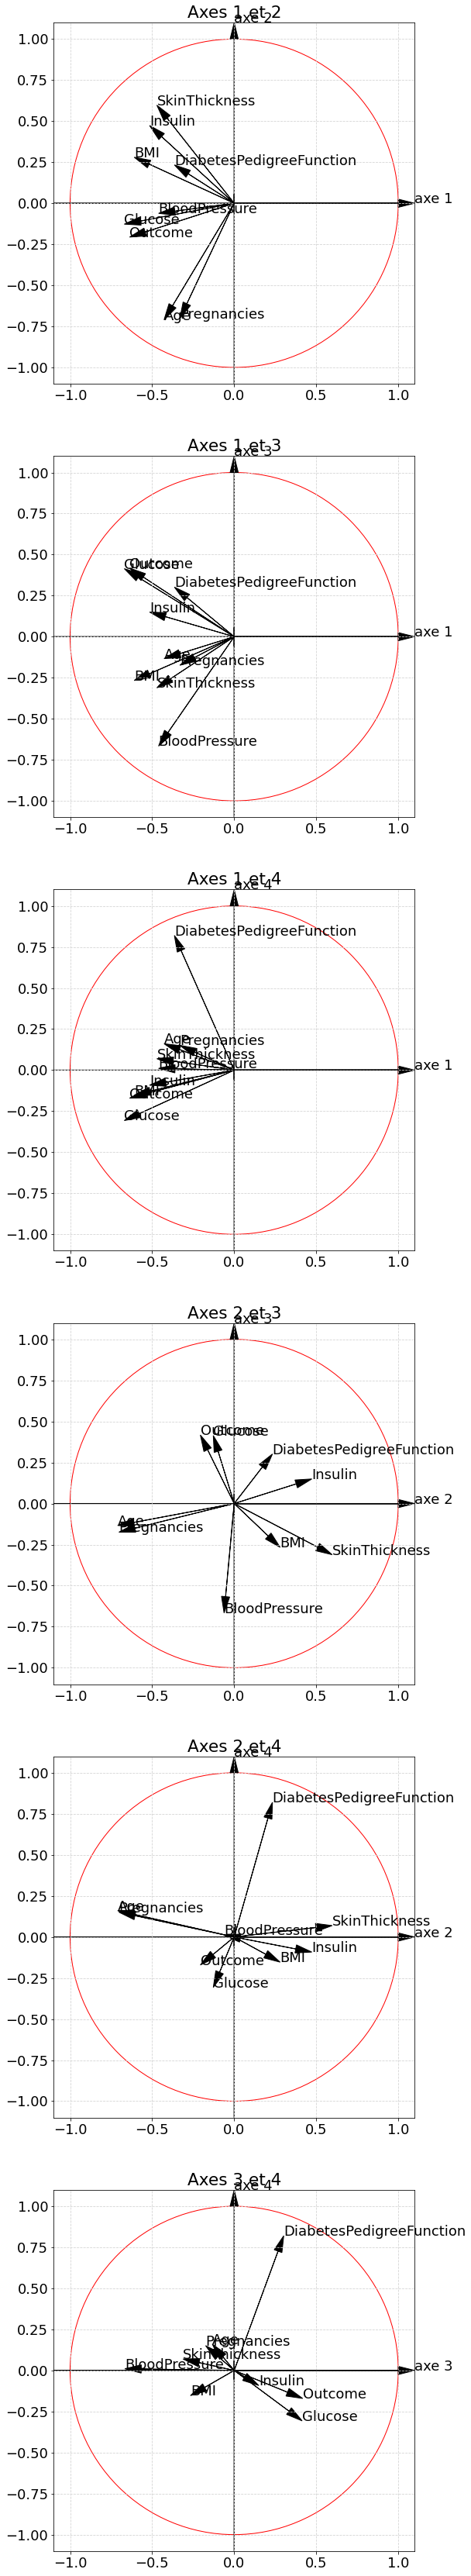

In [56]:
# coordonnees maximales de chacune des figures
x_lim = [-1.1,1.1]
y_lim = [-1.1,1.1]
cpt = 0
d = 4
plt.subplots(figsize=(15,15*d))
for i in range(d-1):
    for j in range(i+1,d):
        cpt += 1
        ax = plt.subplot(int('{0}{1}{2}'.format(int(d*(d-1)/2),1,cpt)))
        # cercle unitaire
        cercle = plt.Circle((0,0),1,color='red',fill=False)
        ax.add_artist(cercle)
        #
        # projection du nuage des variables 
        for k in range(len(nomDesVariables)):
            ax.arrow(0, 0, coordonneesDesVariables.iloc[k,i], coordonneesDesVariables.iloc[k,j],length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
            # Ornementation
            plt.text(coordonneesDesVariables.iloc[k,i], coordonneesDesVariables.iloc[k,j], nomDesVariables[k])#,fontsize=fontsize)
        plt.title('Axes {} et {}'.format(i+1,j+1))
        #
        # ajout d'une grille
        plt.grid(color='lightgray',linestyle='--')
        # Ajouter des deux axes correspondants aux axes factoriels
        ax.arrow(x_lim[0], 0, x_lim[1]-x_lim[0], 0,length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(plt.xlim(), np.zeros(2),'k-')
        plt.text(x_lim[1], 0, "axe {:d}".format(i+1))
        #
        ax.arrow(0, y_lim[0], 0, y_lim[1]-y_lim[0],length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(np.zeros(2),plt.ylim(),'k-')
        plt.text(0,y_lim[1], "axe {:d}".format(j+1))
        #        ax.set_ylim([-1.1, 1.1])
        ax.set_xlim(x_lim)
        ax.set_ylim(y_lim)
        ax.set_aspect('equal')
        

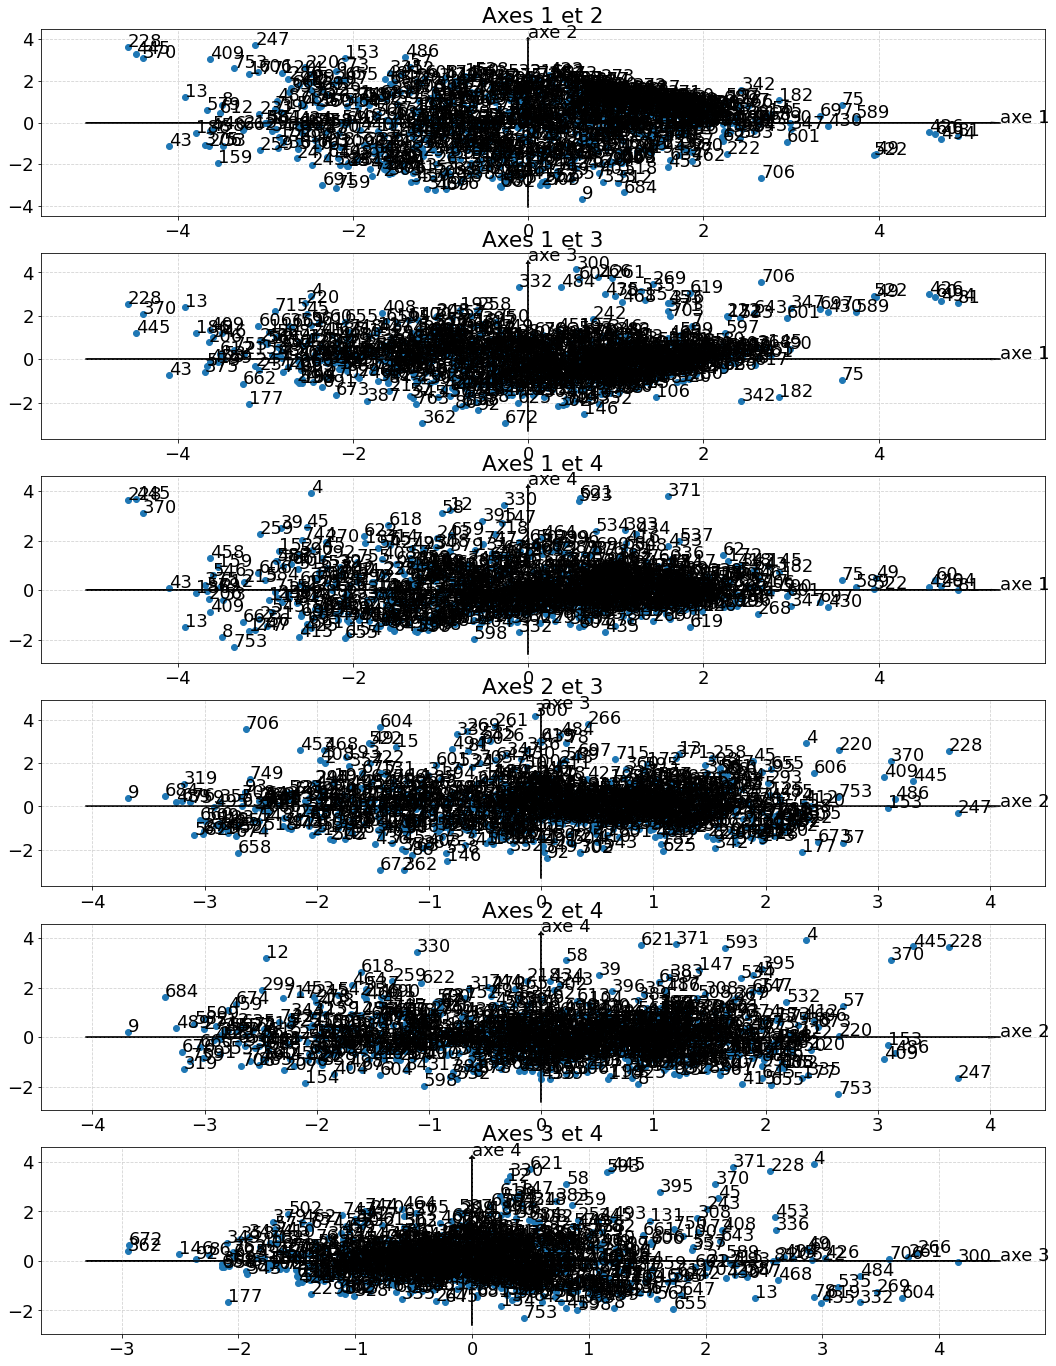

In [57]:
cpt = 0
plt.subplots(figsize=(18,6*d))
for i in range(d-1):
    for j in range(i+1,d):
        cpt += 1
        ax = plt.subplot(int('{}{}{}'.format(int(d*(d-1)/2),1,cpt)))
        plt.plot(lesNouvellesCoordonnees[:,i],lesNouvellesCoordonnees[:,j],'o')
        plt.title('Axes {} et {}'.format(i+1,j+1))
        if len(nomDesIndividus) != 0 :
            for k in  range(len(nomDesIndividus)):
                plt.text(lesNouvellesCoordonnees[k,i], lesNouvellesCoordonnees[k,j], nomDesIndividus[k])#,fontsize=fontsize)
        # Ajouter les axes
        plt.grid(color='lightgray',linestyle='--')
        x_lim = plt.xlim()
        ax.arrow(x_lim[0], 0, x_lim[1]-x_lim[0], 0,length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(plt.xlim(), np.zeros(2),'k-')
        plt.text(x_lim[1], 0, "axe {:d}".format(i+1))
        y_lim = plt.ylim()
        ax.arrow(0,y_lim[0], 0, y_lim[1]-y_lim[0],length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(np.zeros(2),plt.ylim(),'k-')
        plt.text(0,y_lim[1], "axe {:d}".format(j+1))

In [65]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def determine_k(data, max_k):
    silhouette_scores = []
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_scores.append((k, score))
    return silhouette_scores

# Exemple d'utilisation
print(determine_k(df, 12))

[(2, 0.20214596640334992), (3, 0.1999165629513937), (4, 0.21598011614743987), (5, 0.19605357278926427), (6, 0.14709003257560535), (7, 0.1566258459470844), (8, 0.16306722818405242), (9, 0.16716027283591692), (10, 0.1677455299636604), (11, 0.15003121942593975), (12, 0.15558581373120084)]


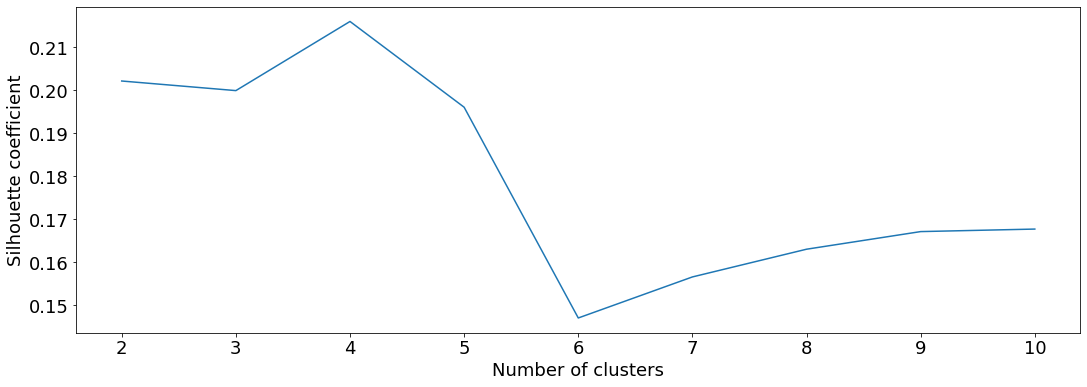

In [66]:
import matplotlib.pyplot as plt

def plot_silhouette(data, max_k):
    silhouette_scores = determine_k(data, max_k)
    k_values = [k for k, score in silhouette_scores]
    scores = [score for k, score in silhouette_scores]

    plt.plot(k_values, scores)
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette coefficient')
    plt.show()

# Exemple d'utilisation
plot_silhouette(df, 10)


In [71]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=0).fit(lesNouvellesCoordonnees)

In [72]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=int32), array([176, 145, 104,  35, 105, 203]))

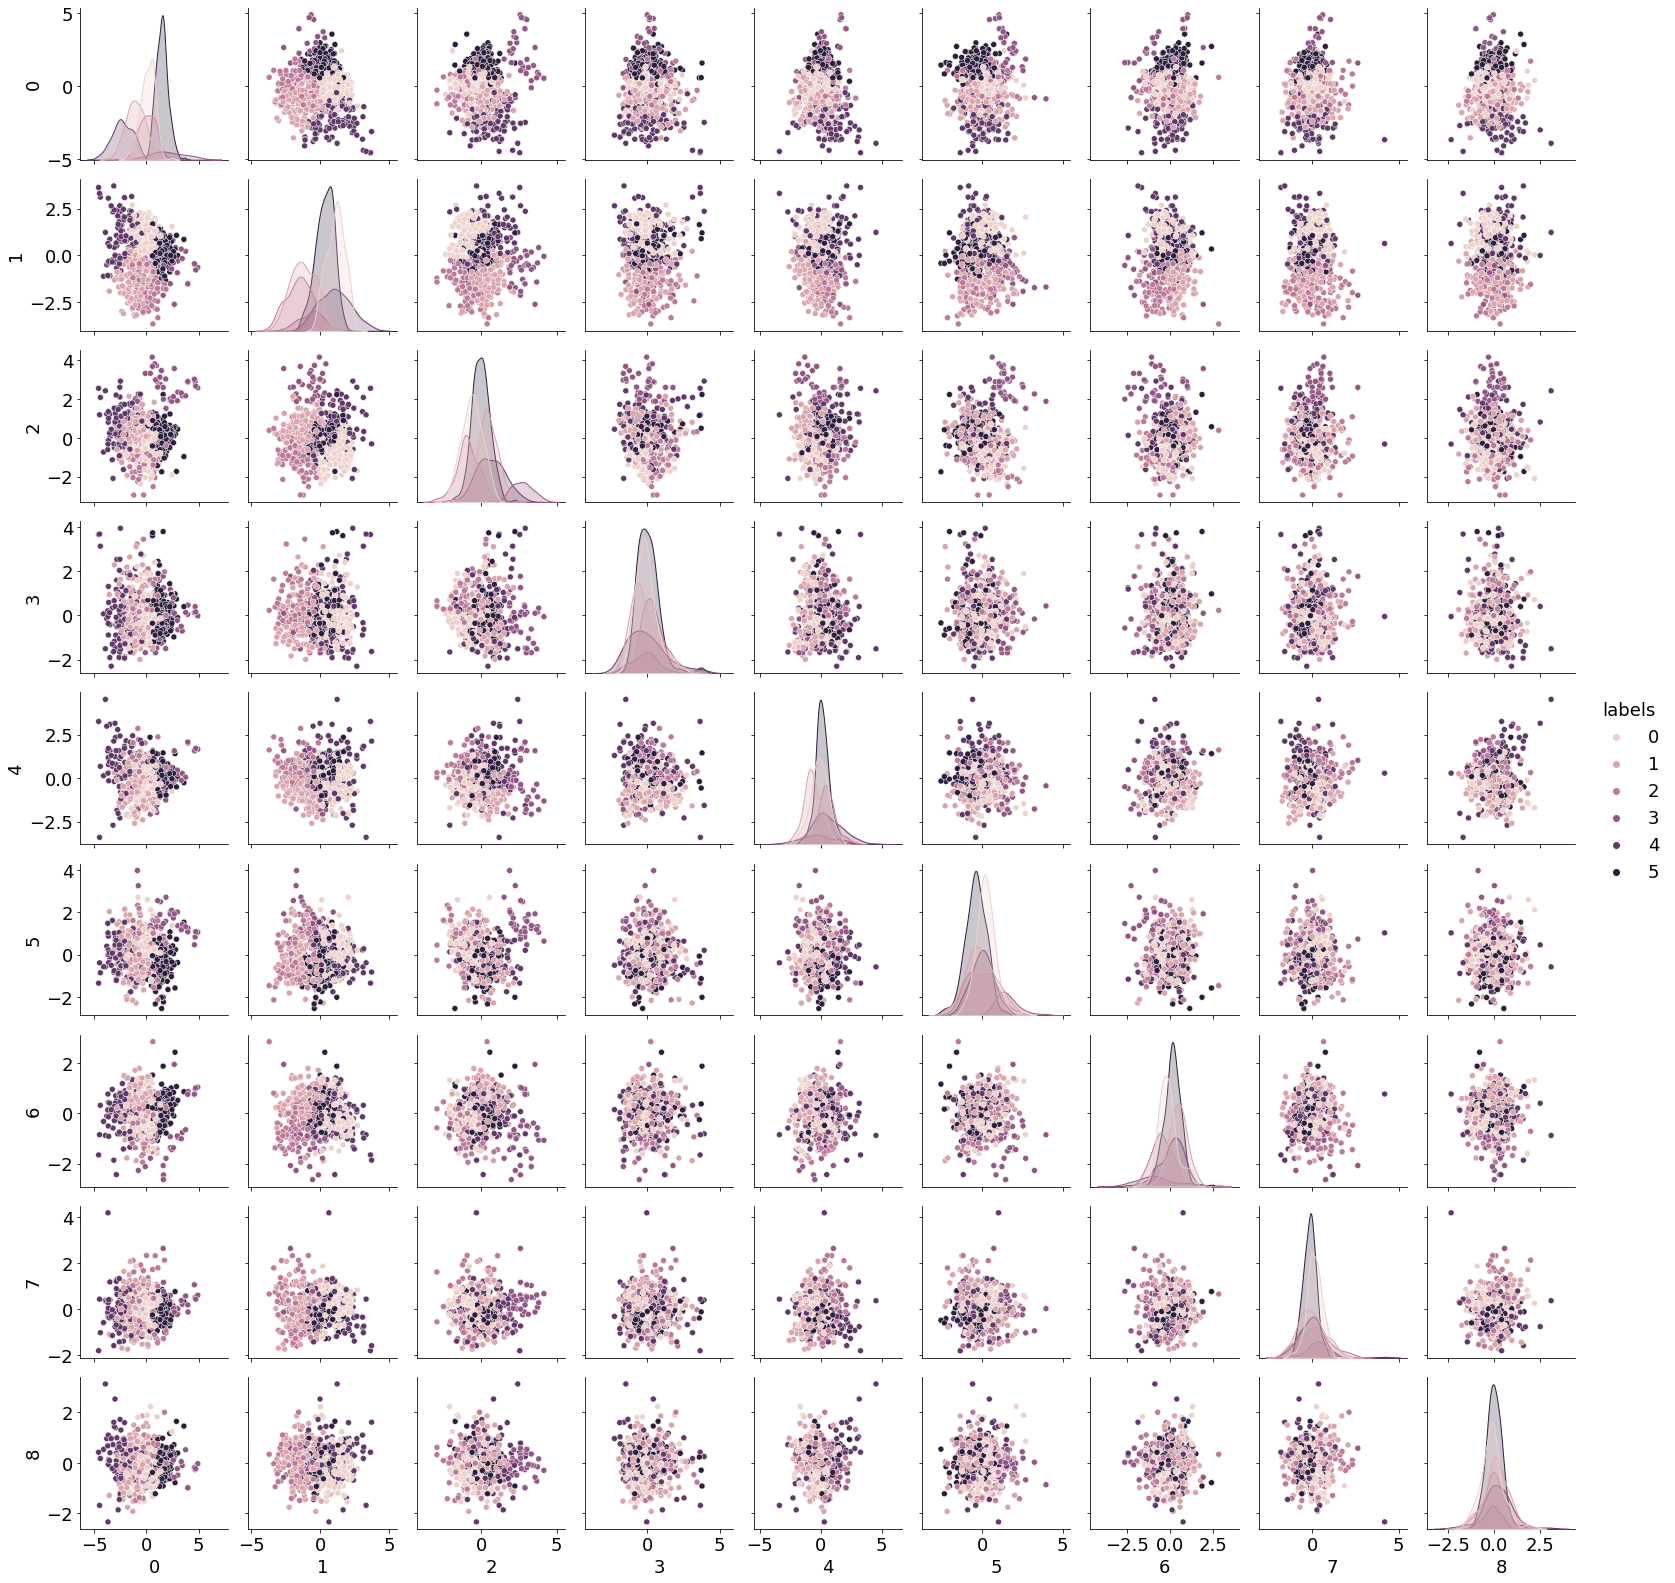

In [73]:
df_2 = pd.DataFrame(lesNouvellesCoordonnees)
df_2['labels'] = kmeans.labels_

sns.pairplot(df_2,hue = 'labels')